In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def signum(x):
    if x >= 0:
        return 1
    else:
        return -1

In [3]:
def perceptron(x, w, b):
    return signum(np.dot(w, x) + b)

In [4]:
def normalizeData(data : pd.DataFrame):
    data = np.abs(data - data.mean()) / data.std()
    return data

In [5]:
data = pd.read_csv('penguins.csv')

# PreProcessing

In [6]:
data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
      'body_mass_g']] = data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
                              'body_mass_g']].apply(lambda x: normalizeData(x))

In [7]:
data.gender.fillna(data.gender.mode()[0],inplace=True)
data.gender.unique()

array(['male', 'female'], dtype=object)

In [8]:
#encode male to 0 and female to 1
gender_dict ={"male":1,"female":0}
data.gender = data.gender.apply(lambda x: gender_dict[x])


# Train Test Split

In [9]:
import warnings
warnings.filterwarnings("ignore")
def splitData(data,class1,class2):
    data = data.sample(frac=1).reset_index(drop=True)
    class1_data = data[data.species == class1]
    class2_data = data[data.species == class2]
    test_data = pd.concat([class1_data[:int(len(class1_data)*0.2)],class2_data[:int(len(class2_data)*0.2)]])
    train_data = pd.concat([class1_data[int(len(class1_data)*0.2):],class2_data[int(len(class2_data)*0.2):]])
    print(len(train_data),len(test_data))
    return train_data,test_data

# Model

In [10]:
def train(data,epoch,lr,feature1,feature2,class1,class2,isBias):
    w = np.array([0, 0])
    b = 0
    data=data[[feature1,feature2,"species"]]
    data = data[(data.species == class1) | (data.species == class2)]
    data = data.reset_index(drop=True)
    data[[feature1,feature2]] = data[[feature1,feature2]].apply(lambda x: normalizeData(x))
    species_dict = {class1:1,class2:-1}
    data.species = data.species.apply(lambda x: species_dict[x])
    for _ in range(epoch):
        for index, row in data.iterrows():
            x = np.array(row)
            y = x[2]
            x = x[0:2]
            if y != perceptron(x, w, b):
                w = w + lr * y * x
                if isBias:
                    b = b + lr * y
    return w,b

In [18]:
def test(data,feature1,feature2,class1,class2,w,b):
    data=data[[feature1,feature2,"species"]]
    species_dict = {class1:1,class2:-1}
    data.species = data.species.apply(lambda x: species_dict[x])
    correct = 0
    for index, row in data.iterrows():
        x = np.array(row)
        y = x[2]
        x = x[0:2]
        if y == perceptron(x, w, b):
            correct += 1
    return correct/len(data)

In [12]:
train_df,test_df = splitData(data,"Adelie","Chinstrap")

80 20


In [13]:
w,b = train(train_df,1000,1,'bill_length_mm','bill_depth_mm','Adelie','Chinstrap',True)
test(test_df,'bill_length_mm','bill_depth_mm','Adelie','Chinstrap',w,b)

0.5

# Graphes

Adelie and Gentoo
80 20
w , b [-2.17792464 -0.31022953] -1.0
[1.13194371 0.22533075] 1.0
[1.34048627 0.00873859] 1.0
[1.54902883 0.92753878] 1.0
[0.7148586  0.13170302] 1.0
[0.50631605 0.55302783] 1.0
[1.34048627 0.10236633] 1.0
[1.60590407 0.14918019] 1.0
[1.05611006 1.53611907] 1.0
[0.54423288 1.3488636 ] 1.0
[0.99923482 0.69346944] 1.0
[0.11931162 1.60041012] -1.0
[0.30889576 1.78766559] -1.0
[0.8966066  1.08545757] -1.0
[0.97244026 0.47687727] -1.0
[0.24089825 1.60041012] -1.0
[0.80181453 1.1790853 ] -1.0
[2.79244802 0.14918019] -1.0
[0.55535515 1.08545757] -1.0
[1.01035709 1.41315465] -1.0
[0.08923094 0.00873859] -1.0
0.5


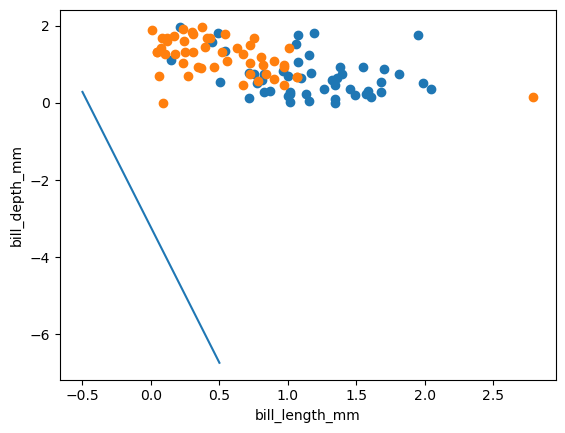

Adelie and Chinstrap
80 20
w , b [-0.60029203 -0.55430953] 0.0
[1.68173773 0.55302783] 1.0
[0.50631605 0.55302783] 1.0
[0.7148586  0.78709718] 1.0
[0.82860909 0.74028331] 1.0
[0.14610618 1.11479426] 1.0
[1.60590407 0.14918019] 1.0
[1.26465261 0.36577236] 1.0
[1.68173773 0.27214462] 1.0
[1.39736151 0.74028331] 1.0
[0.48735763 1.81700228] 1.0
[1.50327585 1.25523586] -1.0
[0.75277543 0.33643567] -1.0
[0.99139867 0.27214462] -1.0
[0.30889576 0.27214462] -1.0
[0.87764819 0.78709718] -1.0
[0.32785418 0.22533075] -1.0
[0.31673191 0.33643567] -1.0
[0.78285612 1.02116652] -1.0
[0.2330621  0.41258623] -1.0
[1.14306598 0.83391105] -1.0
0.5


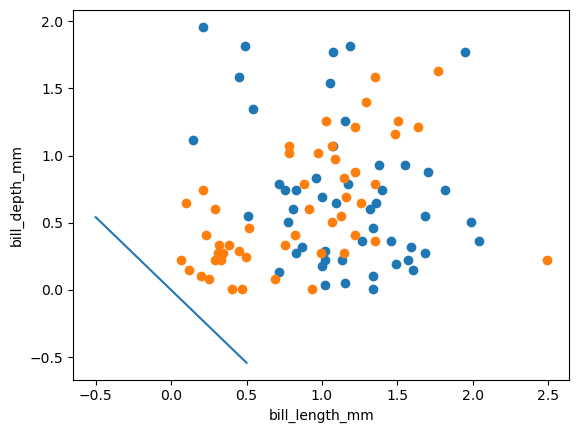

Chinstrap and Gentoo
80 20
w , b [-0.03173087  0.3186977 ] -2.0
[0.21410369 0.74028331] 1.0
[0.2330621  0.41258623] 1.0
[0.25202052 0.08488915] 1.0
[1.2947333  1.39567747] 1.0
[0.31673191 0.33643567] 1.0
[1.48431744 1.16160813] 1.0
[1.21889964 0.88072491] 1.0
[0.4984799  0.24280793] 1.0
[1.1620244  0.69346944] 1.0
[0.68806404 0.08488915] 1.0
[0.97244026 0.47687727] -1.0
[0.2330621 1.0386437] -1.0
[0.83973136 0.75776049] -1.0
[0.72598087 1.0386437 ] -1.0
[0.04347796 1.31952691] -1.0
[0.6311888  1.41315465] -1.0
[0.29777349 1.83447946] -1.0
[0.2330621 1.9281072] -1.0
[1.01035709 1.41315465] -1.0
[0.39256556 1.45996851] -1.0
0.5


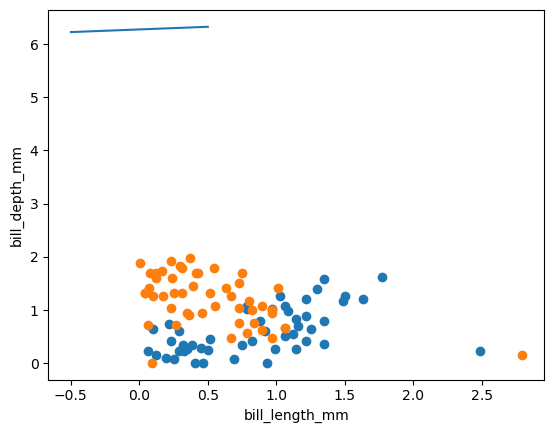

Adelie and Gentoo
80 20
w , b [-1.44793067 -1.15108885] 0.0
[1.70069614 0.7259169 ] 1.0
[1.94715552 0.06732294] 1.0
[1.18881896 0.57956269] 1.0
[1.45423676 1.53086508] 1.0
[1.56798724 1.01862533] 1.0
[1.68173773 0.65273979] 1.0
[1.16986054 0.28685426] 1.0
[0.21410369 0.36003137] 1.0
[1.54902883 0.43320847] 1.0
[0.96131799 1.09180244] 1.0
[0.07027252 1.24986499] -1.0
[0.27097893 1.17668788] -1.0
[0.10035321 0.88397945] -1.0
[0.17618686 0.81080234] -1.0
[0.11931162 0.81080234] -1.0
[0.08139479 0.81080234] -1.0
[0.43048239 1.03033367] -1.0
[0.41152398 0.66444813] -1.0
[0.80181453 1.54257341] -1.0
[0.16506459 0.66444813] -1.0
0.5


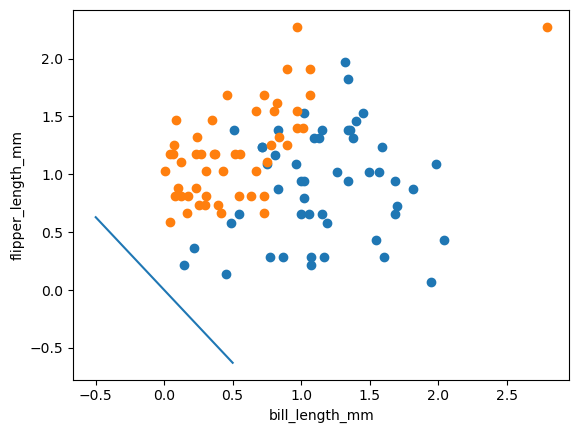

Adelie and Chinstrap
80 20
w , b [ 0.38417512 -0.80813557] -1.0
[1.68173773 0.65273979] 1.0
[0.96131799 1.09180244] 1.0
[1.01819323 0.94544822] 1.0
[0.75277543 1.09180244] 1.0
[1.15090213 0.65273979] 1.0
[1.49215358 1.01862533] 1.0
[1.13194371 1.31133376] 1.0
[1.01819323 1.53086508] 1.0
[1.26465261 1.01862533] 1.0
[1.05611006 0.65273979] 1.0
[0.51743832 0.28685426] -1.0
[1.14306598 0.21367715] -1.0
[1.06723233 0.07903128] -1.0
[1.35160854 0.14050005] -1.0
[0.34681259 0.28685426] -1.0
[0.10035321 0.79909401] -1.0
[0.91556501 0.28685426] -1.0
[0.78285612 0.81080234] -1.0
[0.28993735 0.65273979] -1.0
[1.2947333  0.36003137] -1.0
0.5


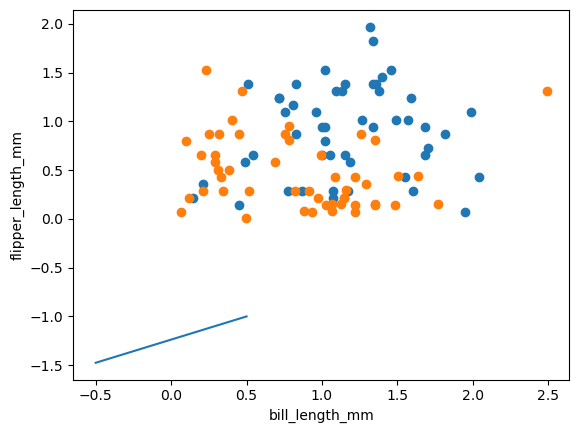

Chinstrap and Gentoo
80 20
w , b [ 0.6480633  -0.19564824] -1.0
[0.97244026 0.21367715] 1.0
[0.32785418 0.43320847] 1.0
[1.35160854 0.15220838] 1.0
[1.2947333  0.36003137] 1.0
[1.0293155  0.14050005] 1.0
[0.46839922 1.31133376] 1.0
[1.48431744 0.14050005] 1.0
[0.30889576 0.50638558] 1.0
[1.12410757 0.15220838] 1.0
[0.28993735 0.57956269] 1.0
[0.97244026 1.54257341] -1.0
[0.66910563 1.03033367] -1.0
[0.37360715 1.17668788] -1.0
[0.24089825 1.32304209] -1.0
[0.80181453 1.54257341] -1.0
[0.11931162 0.81080234] -1.0
[0.83973136 1.32304209] -1.0
[2.79244802 2.27434448] -1.0
[0.39256556 0.73762524] -1.0
[0.10035321 0.88397945] -1.0
0.45


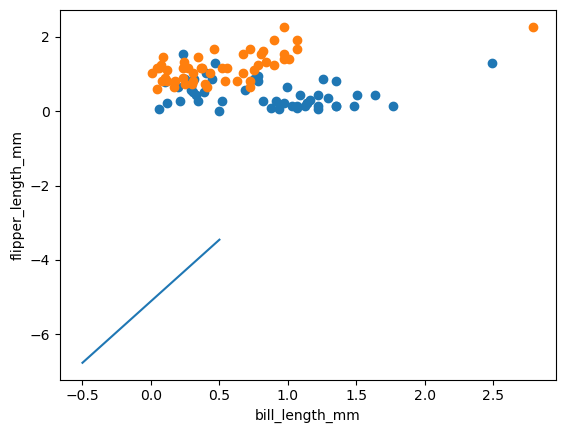

Adelie and Gentoo
80 20
w , b [-0.10635751  0.        ] 0.0
[1.68173773 0.        ] 1.0
[0.48735763 1.        ] 1.0
[1.58694565 0.        ] 1.0
[0.96131799 1.        ] 1.0
[1.15090213 1.        ] 1.0
[0.77173385 1.        ] 1.0
[0.7148586 0.       ] 1.0
[1.18881896 1.        ] 1.0
[0.82860909 0.        ] 1.0
[0.80965067 1.        ] 1.0
[0.24089825 0.        ] -1.0
[0.34681259 1.        ] -1.0
[0.30889576 0.        ] -1.0
[0.54423288 0.        ] -1.0
[1.06723233 1.        ] -1.0
[0.39256556 0.        ] -1.0
[0.30889576 0.        ] -1.0
[0.66910563 1.        ] -1.0
[0.72598087 1.        ] -1.0
[1.06723233 1.        ] -1.0
0.5


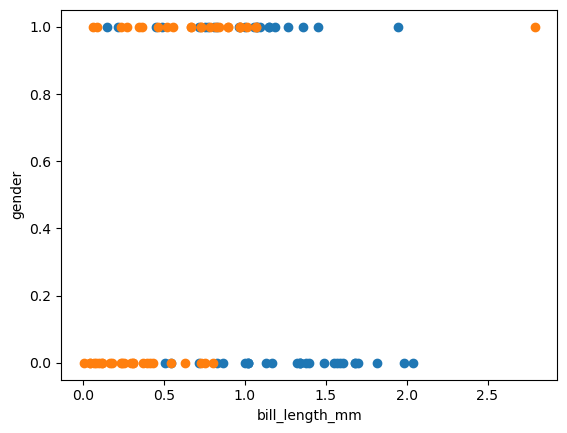

Adelie and Chinstrap
80 20
w , b [-1.17269934 -0.49936829] -1.0
[0.99923482 1.        ] 1.0
[1.94715552 1.        ] 1.0
[0.77173385 1.        ] 1.0
[0.14610618 1.        ] 1.0
[1.09402689 1.        ] 1.0
[1.39736151 0.        ] 1.0
[0.96131799 1.        ] 1.0
[0.86652592 0.        ] 1.0
[1.58694565 0.        ] 1.0
[0.99923482 0.        ] 1.0
[1.2947333 1.       ] -1.0
[1.06723233 0.        ] -1.0
[0.78285612 1.        ] -1.0
[0.28993735 0.        ] -1.0
[1.21889964 1.        ] -1.0
[0.91556501 1.        ] -1.0
[0.40368783 0.        ] -1.0
[0.99139867 0.        ] -1.0
[0.82077294 1.        ] -1.0
[1.14306598 0.        ] -1.0
0.5


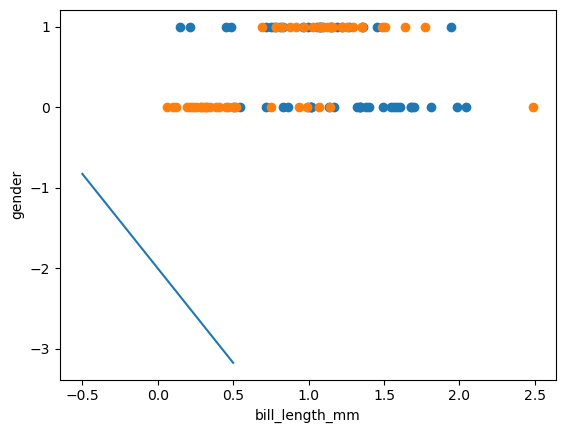

Chinstrap and Gentoo
80 20
w , b [  0.75242798 -11.26784299] 6.0
[1.76869365 1.        ] 1.0
[0.44944081 0.        ] 1.0
[0.78285612 1.        ] 1.0
[2.48911339 0.        ] 1.0
[0.06243638 0.        ] 1.0
[1.35160854 1.        ] 1.0
[1.0293155 1.       ] 1.0
[0.97244026 1.        ] 1.0
[1.48431744 1.        ] 1.0
[0.68806404 1.        ] 1.0
[0.10035321 0.        ] -1.0
[0.27097893 1.        ] -1.0
[0.365771 1.      ] -1.0
[1.06723233 1.        ] -1.0
[2.79244802 1.        ] -1.0
[0.46056307 1.        ] -1.0
[0.83973136 1.        ] -1.0
[0.08139479 0.        ] -1.0
[0.8966066 1.       ] -1.0
[0.06243638 1.        ] -1.0
0.55


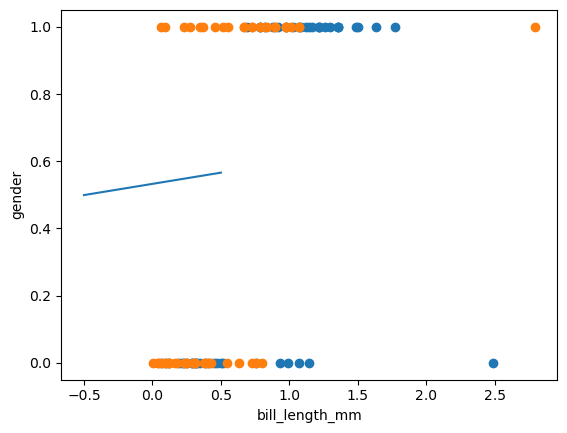

Adelie and Gentoo
80 20
w , b [-1.46367956 -2.55470842] 0.0
[1.09402689 0.52008821] 1.0
[0.99923482 0.83812014] 1.0
[1.94715552 0.3067948 ] 1.0
[0.44944081 0.43400757] 1.0
[1.98507235 1.06074249] 1.0
[1.34048627 0.96533291] 1.0
[1.54902883 0.90172652] 1.0
[0.80965067 0.77451375] 1.0
[1.34048627 0.5836946 ] 1.0
[0.48735763 0.01123713] 1.0
[0.11931162 0.05236926] -1.0
[0.29777349 0.3067948 ] -1.0
[0.97244026 1.76974166] -1.0
[0.16506459 0.24318841] -1.0
[0.78285612 1.76974166] -1.0
[0.27097893 1.13367781] -1.0
[1.06723233 1.76974166] -1.0
[2.79244802 2.40580551] -1.0
[0.8966066  1.96056082] -1.0
[0.97244026 1.96056082] -1.0
0.5


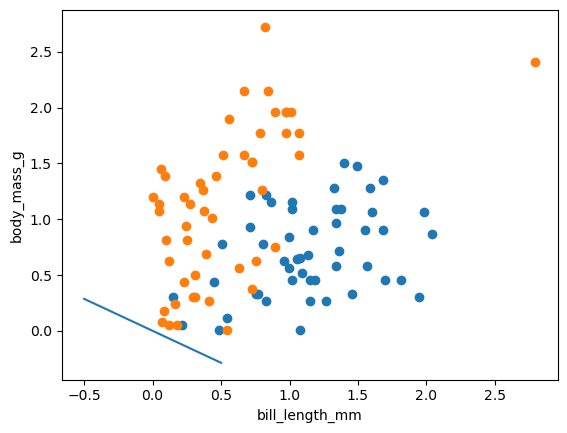

Adelie and Chinstrap
80 20
w , b [-3.85416968  0.88354736] -1.0
[1.39736151 1.50598718] 1.0
[1.05611006 0.64730098] 1.0
[1.98507235 1.06074249] 1.0
[1.34048627 0.5836946 ] 1.0
[0.75277543 0.32926905] 1.0
[1.01819323 0.45648183] 1.0
[0.50631605 0.77451375] 1.0
[0.7148586  0.93352972] 1.0
[1.32152786 1.28336483] 1.0
[1.34048627 0.96533291] 1.0
[1.76869365 0.17958203] -1.0
[1.35160854 0.01123713] -1.0
[0.44944081 1.02893929] -1.0
[0.91556501 0.71090737] -1.0
[1.1620244  0.07484351] -1.0
[0.28993735 0.5836946 ] -1.0
[0.93452343 0.61549779] -1.0
[0.2330621  1.15615206] -1.0
[1.21889964 0.52008821] -1.0
[0.11931162 0.83812014] -1.0
0.5


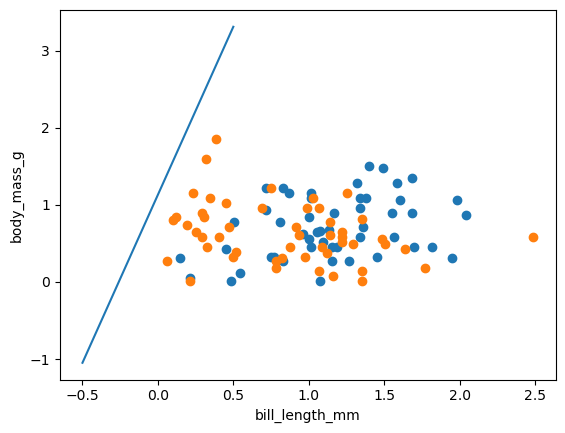

Chinstrap and Gentoo
80 20
w , b [ 0.4141408  -3.01833734] -2.0
[0.32785418 0.45648183] 1.0
[1.06723233 0.96533291] 1.0
[1.14306598 0.77451375] 1.0
[0.51743832 0.39287544] 1.0
[1.1620244  0.07484351] 1.0
[0.38472942 1.8558223 ] 1.0
[1.21889964 0.64730098] 1.0
[1.08619074 0.45648183] 1.0
[0.31673191 1.60139676] 1.0
[0.93452343 0.61549779] 1.0
[0.97244026 1.96056082] -1.0
[0.46056307 1.38810335] -1.0
[0.08923094 1.38810335] -1.0
[0.8966066  1.96056082] -1.0
[0.10035321 0.81564588] -1.0
[0.27097893 1.13367781] -1.0
[0.04347796 1.13367781] -1.0
[0.8966066 0.7520395] -1.0
[0.24089825 0.94285865] -1.0
[0.2330621  1.19728419] -1.0
0.5


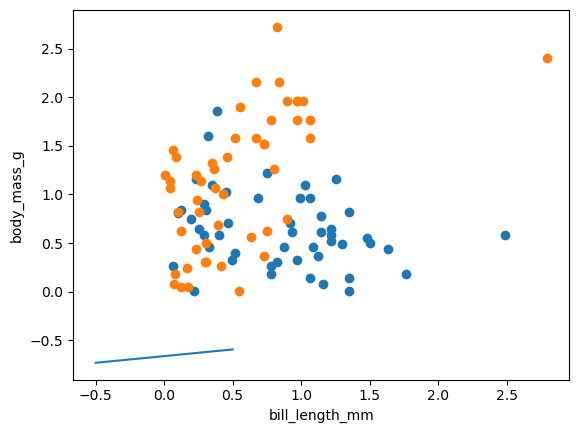

Adelie and Gentoo
80 20
w , b [-1.34700642 -1.7569382 ] 0.0
[1.53611907 0.65273979] 1.0
[0.36577236 0.43320847] 1.0
[0.17851689 0.94544822] 1.0
[0.74028331 0.87227111] 1.0
[0.27214462 0.65273979] 1.0
[0.74028331 1.38451086] 1.0
[0.27214462 0.87227111] 1.0
[0.88072491 0.7259169 ] 1.0
[0.78709718 0.28685426] 1.0
[0.22533075 1.01862533] 1.0
[1.69403786 1.10351077] -1.0
[0.66413275 1.68892763] -1.0
[0.75776049 0.66444813] -1.0
[1.31952691 0.73762524] -1.0
[0.14918019 2.27434448] -1.0
[1.08545757 1.24986499] -1.0
[0.57050501 1.24986499] -1.0
[1.50678238 0.81080234] -1.0
[1.31952691 0.59127102] -1.0
[1.0386437  1.68892763] -1.0
0.5


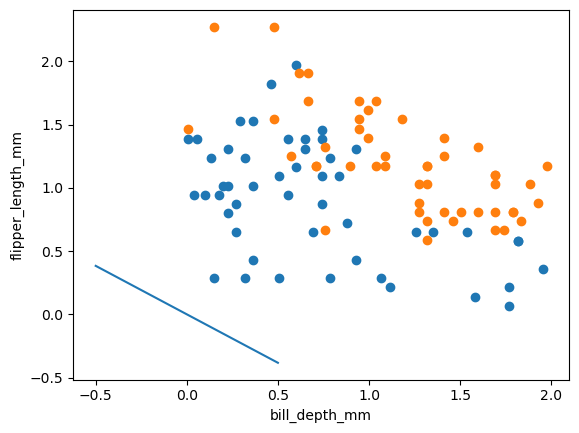

Adelie and Chinstrap
80 20
w , b [ 0.43043368 -1.28176887] -2.0
[0.22533075 1.31133376] 1.0
[0.78709718 0.28685426] 1.0
[0.74028331 1.38451086] 1.0
[1.81700228 0.57956269] 1.0
[1.25523586 0.65273979] 1.0
[1.06798039 0.28685426] 1.0
[0.36577236 1.01862533] 1.0
[0.13170302 1.23815665] 1.0
[0.31895849 1.23815665] 1.0
[0.2896218  1.53086508] 1.0
[0.69346944 0.2985626 ] -1.0
[0.78709718 0.07903128] -1.0
[0.10236633 0.65273979] -1.0
[0.08488915 0.57956269] -1.0
[0.27214462 0.65273979] -1.0
[1.02116652 0.21367715] -1.0
[0.33643567 0.87227111] -1.0
[0.00873859 1.31133376] -1.0
[0.97435265 0.43320847] -1.0
[0.36577236 0.15220838] -1.0
0.5


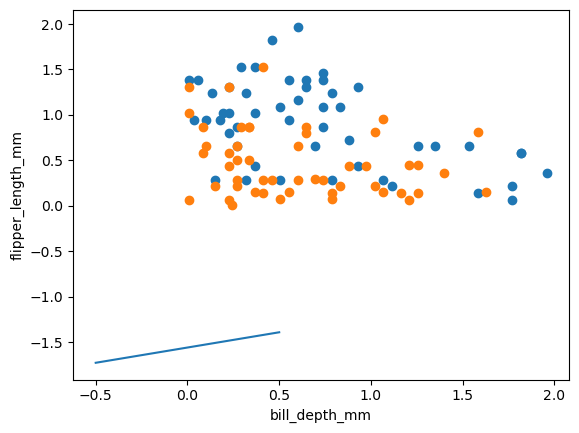

Chinstrap and Gentoo
80 20
w , b [-2.41677566 -0.68794371] 0.0
[0.22533075 0.43320847] 1.0
[1.58293294 0.81080234] 1.0
[0.5998417  0.28685426] 1.0
[0.33643567 0.87227111] 1.0
[0.00873859 0.06732294] 1.0
[0.33643567 0.87227111] 1.0
[1.06798039 0.15220838] 1.0
[0.00873859 1.01862533] 1.0
[1.62974681 0.15220838] 1.0
[1.20842199 0.06732294] 1.0
[1.31952691 1.03033367] -1.0
[1.50678238 0.81080234] -1.0
[1.41315465 1.3962192 ] -1.0
[1.31952691 1.17668788] -1.0
[1.69403786 1.03033367] -1.0
[1.45996851 0.73762524] -1.0
[1.27271304 0.88397945] -1.0
[0.71094662 1.17668788] -1.0
[0.71094662 1.17668788] -1.0
[0.99182983 1.3962192 ] -1.0
0.5


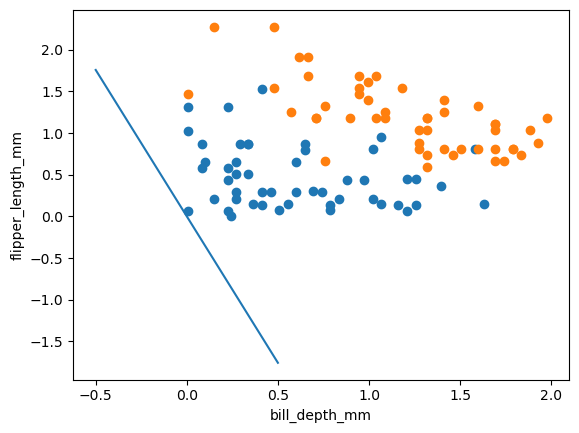

Adelie and Gentoo
80 20
w , b [ 0.42539975 -1.11829616] -1.0
[0.19599406 0.        ] 1.0
[1.25523586 1.        ] 1.0
[1.06798039 1.        ] 1.0
[1.53611907 1.        ] 1.0
[0.36577236 0.        ] 1.0
[1.77018842 1.        ] 1.0
[0.92753878 0.        ] 1.0
[1.81700228 1.        ] 1.0
[0.22533075 0.        ] 1.0
[0.55302783 0.        ] 1.0
[0.99182983 1.        ] -1.0
[1.41315465 0.        ] -1.0
[1.45996851 0.        ] -1.0
[1.69403786 0.        ] -1.0
[1.08545757 1.        ] -1.0
[1.83447946 0.        ] -1.0
[1.9281072 0.       ] -1.0
[1.88129333 0.        ] -1.0
[0.75776049 1.        ] -1.0
[1.31952691 0.        ] -1.0
0.5


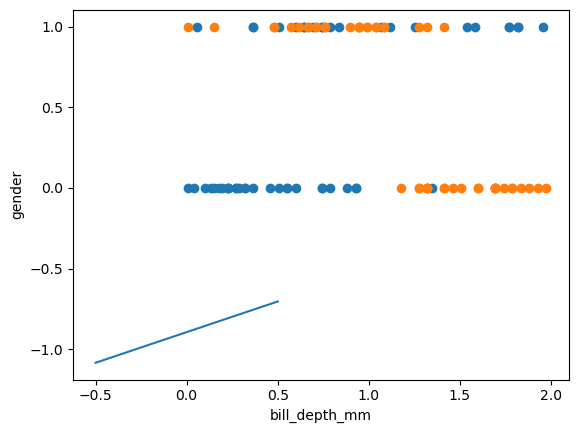

Adelie and Chinstrap
80 20
w , b [-0.80188468 -0.9452261 ] -1.0
[1.25523586 1.        ] 1.0
[0.50621397 1.        ] 1.0
[0.00873859 0.        ] 1.0
[1.06798039 1.        ] 1.0
[0.55302783 0.        ] 1.0
[1.11479426 1.        ] 1.0
[0.22533075 0.        ] 1.0
[0.27214462 0.        ] 1.0
[0.03807528 0.        ] 1.0
[0.36577236 0.        ] 1.0
[0.22533075 0.        ] -1.0
[1.25523586 1.        ] -1.0
[0.74028331 0.        ] -1.0
[0.00873859 0.        ] -1.0
[0.08488915 1.        ] -1.0
[0.64665557 1.        ] -1.0
[0.50621397 0.        ] -1.0
[0.27214462 0.        ] -1.0
[0.69346944 1.        ] -1.0
[0.97435265 1.        ] -1.0
0.5


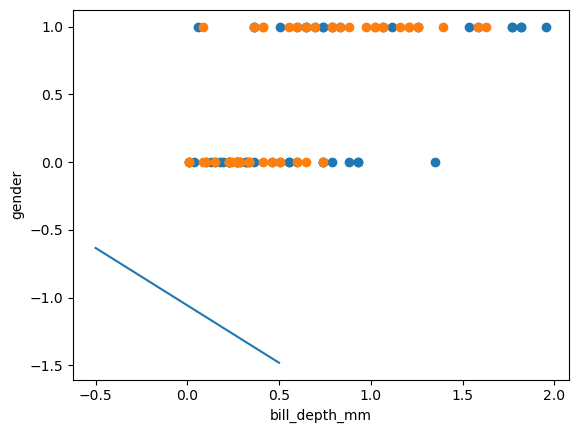

Chinstrap and Gentoo
80 20
w , b [-0.66176593  1.8904522 ] -4.0
[0.33643567 0.        ] 1.0
[1.06798039 1.        ] 1.0
[0.78709718 1.        ] 1.0
[1.20842199 1.        ] 1.0
[0.00873859 0.        ] 1.0
[0.4594001 0.       ] 1.0
[0.24280793 0.        ] 1.0
[0.33643567 0.        ] 1.0
[0.08488915 0.        ] 1.0
[0.69346944 1.        ] 1.0
[1.45996851 0.        ] -1.0
[0.75776049 1.        ] -1.0
[1.9281072 0.       ] -1.0
[1.31952691 1.        ] -1.0
[1.08545757 1.        ] -1.0
[1.69403786 0.        ] -1.0
[1.97492107 0.        ] -1.0
[0.75776049 1.        ] -1.0
[1.69403786 0.        ] -1.0
[1.31952691 0.        ] -1.0
0.5


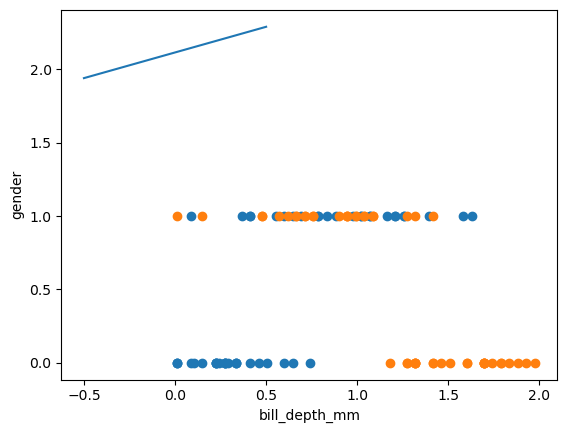

Adelie and Gentoo
80 20
w , b [ 0.02713207 -2.09230413] -2.0
[0.13170302 1.21975845] 1.0
[0.83391105 0.62482673] 1.0
[0.03807528 0.45648183] 1.0
[0.36577236 0.26566267] 1.0
[0.31895849 1.28336483] 1.0
[1.53611907 0.64730098] 1.0
[0.88072491 0.45648183] 1.0
[0.92753878 1.09254568] 1.0
[1.06798039 0.65662992] 1.0
[1.81700228 0.45648183] 1.0
[0.94501596 1.32449696] -1.0
[1.69403786 0.62482673] -1.0
[1.50678238 0.37040118] -1.0
[0.75776049 1.51531612] -1.0
[1.9281072  0.43400757] -1.0
[0.61731888 1.96056082] -1.0
[0.47687727 1.96056082] -1.0
[1.97492107 1.07007142] -1.0
[0.47687727 1.57892251] -1.0
[0.75776049 2.15137997] -1.0
0.5


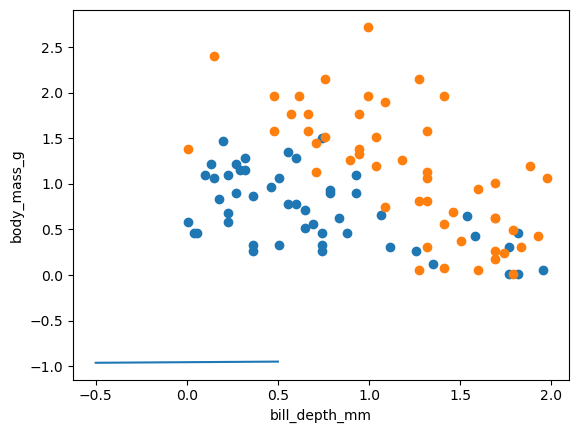

Adelie and Chinstrap
80 20
w , b [-0.74896058  0.60440657] -2.0
[1.81700228 0.01123713] 1.0
[1.25523586 0.26566267] 1.0
[0.36577236 0.32926905] 1.0
[0.10236633 1.09254568] 1.0
[0.92753878 0.90172652] 1.0
[0.92753878 1.09254568] 1.0
[1.81700228 0.45648183] 1.0
[0.50621397 0.32926905] 1.0
[1.3488636  0.11597564] 1.0
[0.5998417  0.77451375] 1.0
[0.55302783 0.37040118] -1.0
[0.10236633 0.74271056] -1.0
[0.69346944 0.07484351] -1.0
[0.4594001  0.39287544] -1.0
[1.25523586 1.09254568] -1.0
[1.58293294 0.81564588] -1.0
[0.88072491 0.64730098] -1.0
[0.33643567 1.60139676] -1.0
[0.41258623 1.15615206] -1.0
[0.50621397 0.96533291] -1.0
0.5


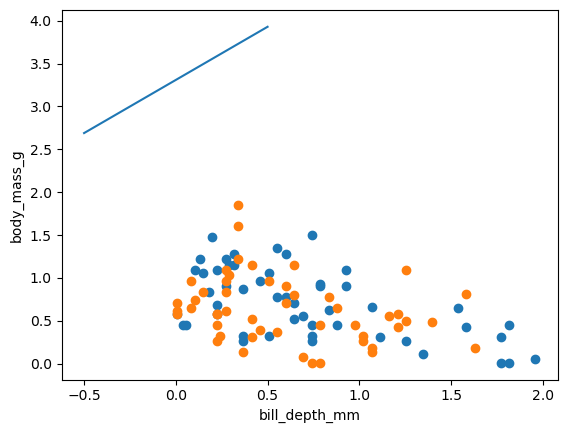

Chinstrap and Gentoo
80 20


In [ ]:
cols = ["bill_length_mm","bill_depth_mm","flipper_length_mm","gender","body_mass_g"]
def two_F_graph(data , f1 , f2 , cls1 , cls2 ,c_line = True ):
    data1 = data[data["species"] == cls1]
    data2 = data[data["species"] == cls2]
    if c_line==False:
        plot_data(data1[f1] ,data1[f2] , data2[f1] ,data2[f2] ,f1 , f2)
    else:
        train_df,test_df = splitData(data,cls1,cls2)
        w1,b1 = train(train_df,1000,1,f1,f2,cls1,cls2,True)
        print("w , b" , w1 , b1)
        #print(test(test_df,f1,f2,cls1,cls2,w1,b1))
        plot_data(data1[f1] ,data1[f2] , data2[f1] ,data2[f2] ,f1 , f2 ,c_line = True , linea =w1 , linec=b1  )
        

def plot_data(x1 ,y1 , x2, y2 , l1 ,l2 ,c_line = False, linea =0 , linec=0):
    plt.figure(l1 + " and " + l2)
    plt.scatter(x1 , y1)
    plt.scatter(x2 , y2)
    if c_line == True:
        line = np.linspace(-0.5 ,0.5 )
        line_y = -((linec + (line* linea[0]))/linea[1]) 
        plt.plot(line  , line_y , linestyle='-')
    plt.xlabel(l1)
    plt.ylabel(l2)
    plt.show()
def graphes(data , c_line=False ):
    
    for i in range(5):
        j=i+1
        while j<5:
            print("Adelie and Gentoo")
            two_F_graph(data , cols[i] , cols[j] , "Adelie" , "Gentoo" , c_line = c_line )
            print("Adelie and Chinstrap")
            two_F_graph(data , cols[i] , cols[j] , "Adelie" , "Chinstrap" , c_line = c_line )
            print("Chinstrap and Gentoo")
            two_F_graph(data , cols[i] , cols[j] , "Chinstrap" , "Gentoo" , c_line = c_line )

            j=j+1
graphes(data ,c_line = True )    
    

80 20
w , b [-1.34922176 -3.68750301] 0.0
[1.01819323 0.2896218 ] 1.0
[1.70069614 0.88072491] 1.0
[2.04194759 0.36577236] 1.0
[1.35944468 0.64665557] 1.0
[1.18881896 1.81700228] 1.0
[1.26465261 0.36577236] 1.0
[1.34048627 0.4594001 ] 1.0
[0.54423288 1.3488636 ] 1.0
[0.80965067 0.5998417 ] 1.0
[1.81444662 0.74028331] 1.0
[1.25681647 0.64665557] -1.0
[0.30889576 0.27214462] -1.0
[0.06243638 0.22533075] -1.0
[1.1620244  0.69346944] -1.0
[1.0293155  1.25523586] -1.0
[0.87764819 0.78709718] -1.0
[1.63598475 1.20842199] -1.0
[0.97244026 1.02116652] -1.0
[0.2330621  0.41258623] -1.0
[0.44944081 0.2896218 ] -1.0
0.5


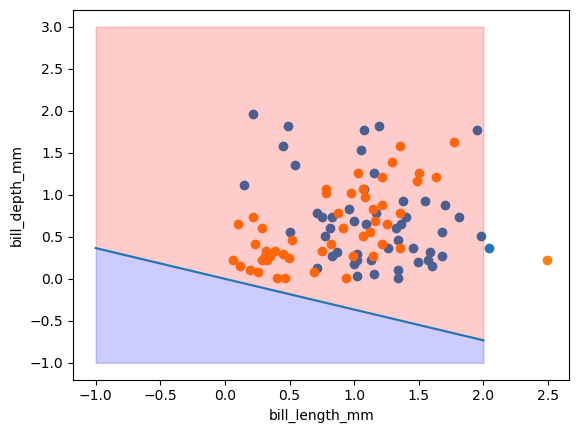

In [20]:
two_F_graph(data , 'bill_length_mm','bill_depth_mm','Adelie','Chinstrap')

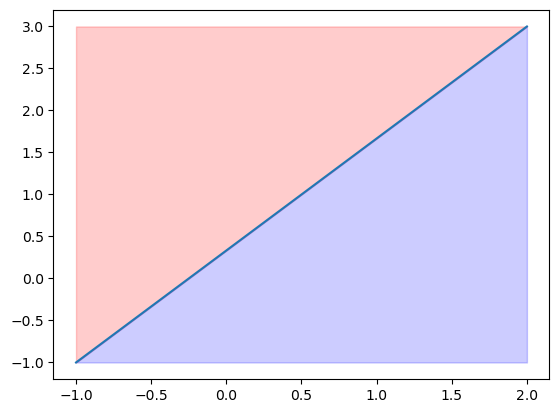

In [16]:
        c = -b/w[1]
        m = -w[0]/w[1]
        xmin , xmax = -1 , 2
        ymin , ymax = -1 , 3
        xd = np.array([xmin , xmax])
        yd = np.array([ymin , ymax])
        plt.plot(xd  , yd , linestyle='-')
        plt.fill_between(xd , yd , ymin , color = "b" ,  alpha =0.2)
        plt.fill_between(xd , yd , ymax , color = "r" ,  alpha =0.2)